In [2]:
eig_vecs

array([[ 0.55738997, -0.83025082],
       [-0.83025082, -0.55738997]])

In [3]:
v

array([ 0.55738997, -0.83025082])

In [4]:
sorted_indices

array([1, 0], dtype=int64)

In [5]:
eig_vals

array([22.78864824,  4.96135176])

In [4]:
eig_vecs[:, 1] 

array([-0.83025082, -0.55738997])

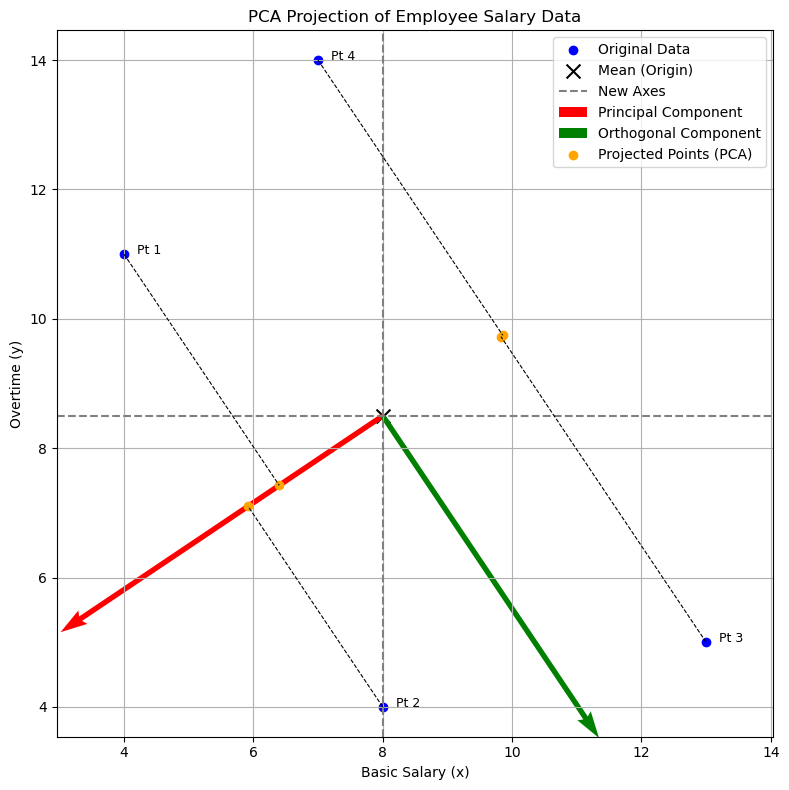

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Original dataset
X = np.array([
    [4, 11],
    [8, 4],
    [13, 5],
    [7, 14]
])

# Step 2: Compute mean
mean_vector = np.mean(X, axis=0)

# Step 3: Center the data
X_dev = X - mean_vector

# Step 4: Covariance matrix (population)
cov_matrix = np.dot(X_dev.T, X_dev) / X_dev.shape[0]

# Step 5: Eigen decomposition
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# Step 6: Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_indices]
eig_vecs = eig_vecs[:, sorted_indices]

# Step 7: Get principal component and orthogonal vector
v = eig_vecs[:, 1]  # largest eigenvalue
v_orth = np.array([-v[1], v[0]])  # 90-degree rotation (orthogonal vector)

# Step 8: Project data onto principal component
Z = np.dot(X_dev, v)

# Step 9: Reconstruct projected points for plotting
projected_points = np.outer(Z, v) + mean_vector

# ---------------------------- Plotting ----------------------------
fig, ax = plt.subplots(figsize=(8, 8))

# Plot original data points
ax.scatter(X[:, 0], X[:, 1], c='blue', label='Original Data')
for i, (x, y) in enumerate(X):
    ax.text(x + 0.2, y, f"Pt {i+1}", fontsize=9)

# Plot mean point
ax.scatter(*mean_vector, c='black', marker='x', s=100, label='Mean (Origin)')

# Plot new axes through mean
ax.axvline(x=mean_vector[0], color='grey', linestyle='--', label='New Axes')
ax.axhline(y=mean_vector[1], color='grey', linestyle='--')

# Plot principal component vector
scale = 6
ax.quiver(*mean_vector, *(v * scale), angles='xy', scale_units='xy', scale=1, color='red', label='Principal Component')
ax.quiver(*mean_vector, *(v_orth * scale), angles='xy', scale_units='xy', scale=1, color='green', label='Orthogonal Component')

# Plot projected points
ax.scatter(projected_points[:, 0], projected_points[:, 1], c='orange', label='Projected Points (PCA)')
for i, (x, y) in enumerate(projected_points):
    ax.plot([X[i, 0], x], [X[i, 1], y], 'k--', linewidth=0.8)  # connect original to projected

# Settings
ax.set_xlabel("Basic Salary (x)")
ax.set_ylabel("Overtime (y)")
ax.set_title("PCA Projection of Employee Salary Data")
ax.axis('equal')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Step i) Input data (excluding Employee ID)
X = np.array([
    [4, 11],
    [8, 4],
    [13, 5],
    [7, 14]
])

# Step ii) Number of features (n) and samples (m)
m, n = X.shape
print("Number of features (n):", n)
print("Number of samples (m):", m)

# Step iii) Compute mean of each variable
mean_vector = np.mean(X, axis=0)
print("Mean vector:", mean_vector)

# Step iv & v) Mean deviation matrix
X_dev = X - mean_vector
print("Mean Deviation Matrix:\n", X_dev)

# Step vi & vii) Compute the population covariance matrix manually
cov_matrix = (X_dev.T @ X_dev) / m
print("Covariance Matrix:\n", cov_matrix)

# Step viii) Compute eigenvalues and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print("Eigenvalues:\n", eig_vals)
print("Eigenvectors (column-wise):\n", eig_vecs)

# Step ix) Find eigenvector for the largest eigenvalue
largest_idx = np.argmax(eig_vals)
principal_vector = eig_vecs[:, largest_idx]
print("Eigenvector corresponding to the largest eigenvalue:\n", principal_vector)

# Step x) Normalize the eigenvector
norm_principal_vector = principal_vector / np.linalg.norm(principal_vector)
print("Normalized eigenvector:\n", norm_principal_vector)

# Step xi) Orthogonal vector to the principal eigenvector (2D)
orthogonal_vector = np.array([-norm_principal_vector[1], norm_principal_vector[0]])
print("Orthogonal vector:\n", orthogonal_vector)

# Step xii) Project data onto the principal component
Z = X_dev @ norm_principal_vector
print("Projected data (Z):\n", Z)


Number of features (n): 3
Number of samples (m): 5
Mean vector: [66. 72. 60.]
Mean Deviation Matrix:
 [[-36.  18.  30.]
 [ -6.  18. -30.]
 [ 24. -12.   0.]
 [ -6. -12.  30.]
 [ 24. -12. -30.]]
Covariance Matrix:
 [[ 504. -252. -360.]
 [-252.  216.    0.]
 [-360.    0.  720.]]
Eigenvalues:
 [1018.03181191   11.15585022  410.81233787]
Eigenvectors (column-wise):
 [[-0.62526811  0.60069739  0.4981992 ]
 [ 0.19646049  0.73898006 -0.64444686]
 [ 0.75527682  0.30507561  0.58007396]]
Eigenvector corresponding to the largest eigenvalue:
 [-0.62526811  0.19646049  0.75527682]
Normalized eigenvector:
 [-0.62526811  0.19646049  0.75527682]
Orthogonal vector:
 [-0.19646049 -0.62526811]
Projected data (Z):
 [ 48.70424518 -15.37040706 -17.36396044  24.05238728 -40.02226496]
